In [1]:
! wget  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/img.tar.gz -P /resources/data

--2020-04-05 08:56:45--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2020-04-05 08:56:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/img.tar.gz
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50460 (49K) [application/octet-stream]
Saving to: ‘/resources/data/img.tar.gz’

img.tar.gz          100%[===================>]  49.28K  --.-KB/s    in 0.03s   

2020-04-05 08:56:45 (1.92 MB/s) - ‘/resources/data/img.tar.gz’ saved [50460/50460]

FINISHED --2020-04-05 08:56:45--
Total wall clock time: 0.2s
Downloaded: 1 files, 49K in 0.03s (1.92 MB/s)


In [0]:
!tar -xf /resources/data/img.tar.gz  

In [3]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/index.csv 

--2020-04-05 08:56:58--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/index.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1680905 (1.6M) [text/csv]
Saving to: ‘index.csv’

index.csv           100%[===================>]   1.60M  5.06MB/s    in 0.3s    

2020-04-05 08:56:59 (5.06 MB/s) - ‘index.csv’ saved [1680905/1680905]



In [0]:
def show_data(data_sample, shape = (28, 28)):
  plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
  plt.title('y = '+data_sample[1])

In [5]:
import torch
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)

In [0]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

In [0]:
directory=""
csv_file = 'index.csv'
csv_path=os.path.join(directory, csv_file)

In [8]:
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


In [9]:
print('File name:', data_name.iloc[0,1])

File name: img/fashion0.png


In [10]:
print('y:', data_name.iloc[0,0])

y: Ankle boot


In [11]:
print('File name:', data_name.iloc[1,1])
print('class or y:', data_name.iloc[1,0])

File name: img/fashion1.png
class or y: T-shirt


In [12]:
print('The number of row: ', data_name.shape[0])

The number of row:  60000


In [13]:
image_name = data_name.iloc[1,1]
image_name

'img/fashion1.png'

In [14]:
image_path = os.path.join(directory, image_name)
image_path

'img/fashion1.png'

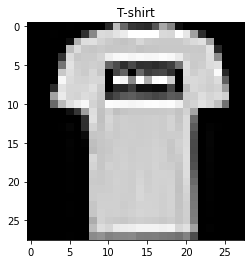

In [15]:
image = Image.open(image_path)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[1,0])
plt.show()

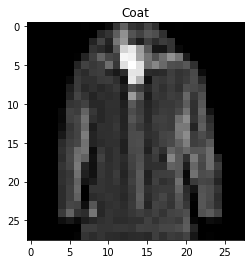

In [16]:
image_name = data_name.iloc[19,1]
image_path = os.path.join(directory, image_name)
image = Image.open(image_path)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[19,0])
plt.show()

In [0]:
class Dataset(Dataset):
  def __init__(self, csv_file, data_dir, transform=None):

    self.data_dir = data_dir

    self.transform = transform 
    data_dircsv_file=os.path.join(self.data_dir, csv_file)
    self.data_name = pd.read_csv(data_dircsv_file)

    self.len = self.data_name.shape[0]

  def __len__(self):
    return self.len
  
  def __getitem__(self, idx):
    img_name = os.path.join(self.data_dir, self.data_name.iloc[idx,1])
    image = Image.open(img_name)

    y = self.data_name.iloc[idx, 0]

    if self.transform:
      image = self.transform(image)

    return image, y

In [0]:
dataset = Dataset(csv_file=csv_file, data_dir=directory)

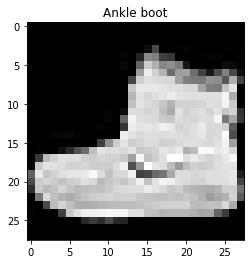

In [28]:
image = dataset[0][0]
y=dataset[0][1]
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

In [0]:
import torchvision.transforms as transforms

In [30]:
croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file = csv_file, data_dir=directory, transform=croptensor_data_transform)
print("The shape of the first element tensor: ", dataset[0][0].shape)

The shape of the first element tensor:  torch.Size([1, 20, 20])


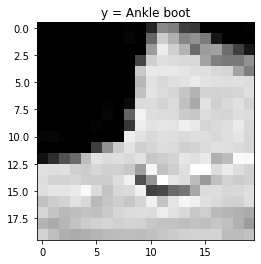

In [33]:
show_data(dataset[0], shape=(20,20))

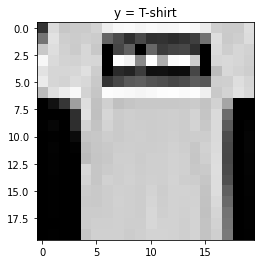

In [34]:
show_data(dataset[1], shape=(20,20))

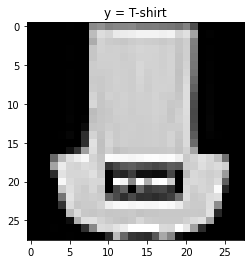

In [37]:
fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1), transforms.ToTensor()])
dataset = Dataset(csv_file, data_dir = directory, transform = fliptensor_data_transform)
show_data(dataset[1])